In [1]:
import cv2
import numpy as np
import torch
from generate_mask_only import gen_mask_only
from IPython.display import display
from PIL import Image
from pipeline_text_diffuser_sd15 import StableDiffusionPipeline
from t_diffusers.unet_2d_condition import UNet2DConditionModel

from diffusers import DDPMScheduler
from hi_sam.text_segmentation import make_text_segmentation_args


td_ckpt = "textdiffuser-ckpt/diffusion_backbone_1.5"


unet = UNet2DConditionModel.from_pretrained(
    td_ckpt,
    subfolder="unet",
)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    unet=unet,
    torch_dtype=torch.float32,
)
pipe.load_ip_adapter(
    "h94/IP-Adapter",
    subfolder=[
        "models",
    ],
    weight_name=[
        "ip-adapter_sd15.safetensors",
    ],
)
pipe.set_ip_adapter_scale(0.4)


input_image = Image.open("./assets/original_input_2.jpeg").convert("RGB").resize((512, 512))


""" Change the text in the original image by coordinates and  """

sample_text="bear"
# for original_input.jpeg. 110, 500에서 가장 가까운 mask의 글자를 바꾼다.
coordinates=[[110, 500]] 

arg_textseg = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='sam_tss_h_textseg.pth',
    input_size=(512, 512),
    hier_det=False,
)

arg_maskgen = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='word_detection_totaltext.pth',
    input_size=(512, 512),
    hier_det=True,
)

out = gen_mask_only(input_image, sample_text=sample_text, coordinates=coordinates, arg_textseg=arg_textseg, arg_maskgen=arg_maskgen)
out.save(f"./assets/mask_1_out.png") # for debugging
text_mask_image = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(42)
pipe.to("cuda")
output = pipe(
    prompt="a cat with a sign board",
    input_image=input_image,
    text_mask_image=text_mask_image,
    ip_adapter_image = input_image,
    width=512,
    height=512,
    guidance_scale=7,
    generator=generator,
).images[0]


/home/dho-larr/anaconda3/envs/MLVUPROJ/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dho-larr/anaconda3/envs/MLVUPROJ/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


OSError: textdiffuser-ckpt/diffusion_backbone_1.5 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `token` or log in with `huggingface-cli login`.

In [ ]:
display(output)

# Image to Image

In [4]:
import cv2
import numpy as np
import torch
from generate_mask_only import gen_mask_only
from IPython.display import display
from PIL import Image
from pipeline_text_diffuser_sd15 import StableDiffusionPipeline
from t_diffusers.unet_2d_condition import UNet2DConditionModel

from diffusers import DDPMScheduler
from hi_sam.text_segmentation import make_text_segmentation_args


td_ckpt = "GoGiants1/td-unet15"


unet = UNet2DConditionModel.from_pretrained(
    td_ckpt,
    subfolder="unet",
)

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    unet=unet,
    torch_dtype=torch.float32,
)
pipe.load_ip_adapter(
    "h94/IP-Adapter",
    subfolder=[
        "models",
    ],
    weight_name=[
        "ip-adapter_sd15.safetensors",
    ],
)
pipe.set_ip_adapter_scale(0.4)


input_image = Image.open("./assets/test01.jpeg").convert("RGB").resize((512, 512))


""" Change the text in the original image by coordinates and  """

sample_text="bear"
# coordinates 에서 가장 가까운 mask의 글자를 바꾼다.
coordinates=[[256, 256]] 

arg_textseg = make_text_segmentation_args(
    model_type='vit_l',
    checkpoint_path='sam_tss_l_hiertext.pth',
    input_size=(512, 512),
    hier_det=False,
)

arg_maskgen = make_text_segmentation_args(
    model_type='vit_h',
    checkpoint_path='word_detection_totaltext.pth',
    input_size=(512, 512),
    hier_det=True,
)

# out은 array로 나옴
out = gen_mask_only(input_image, sample_text=sample_text, coordinates=coordinates, arg_textseg=arg_textseg, arg_maskgen=arg_maskgen)

# text_mask_image = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)

# pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
# generator = torch.Generator(device="cuda").manual_seed(42)
# pipe.to("cuda")
# output = pipe(
#     prompt="a cat with a sign board",
#     input_image=input_image,
#     text_mask_image=text_mask_image,
#     ip_adapter_image = input_image,
#     width=512,
#     height=512,
#     guidance_scale=7,
#     generator=generator,
# ).images[0]



Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


Freeze image encoder.
<All keys matched successfully>
Freeze image encoder.
<All keys matched successfully>


100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

Mask shape:  (512, 512)
masks[the_index].shape: (512, 512)
center_ls[the_index]: (277.8629150390625, 364.7109375)
center_ls[the_index][0] - 512/2: 277.8629150390625-256.0
center_ls[the_index][1] - 512/2: 364.7109375-256.0


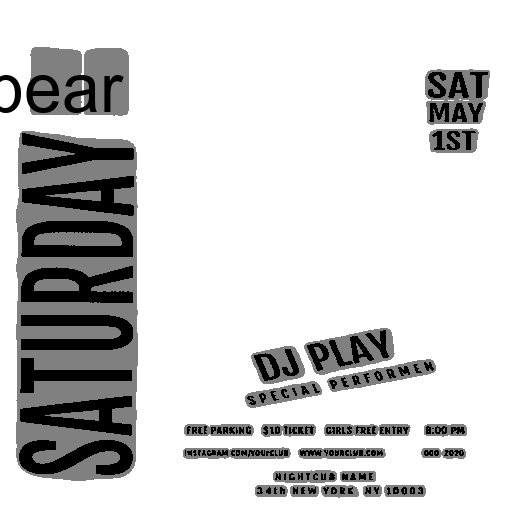

In [2]:
display(out)

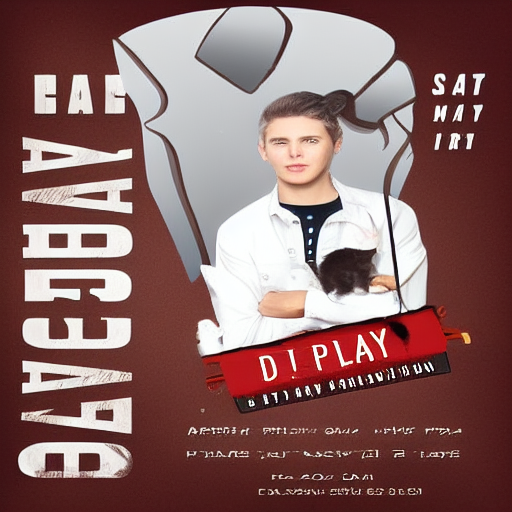

In [3]:
display(output)